Average normalized MSE in motor command output of TorchDIVA vs DIVA over 20 repetitions. The production labeled “example” has no default (trained) forward mapping.

Average RMSE: ae - 20 iterations
0.0005935814525760952
Average RMSE: example - 20 iterations
0.000593581452576095
Average RMSE: happy - 20 iterations
0.0007914583085001134
Average RMSE: i - 20 iterations
0.000593581452576095
Average RMSE: u - 20 iterations
0.0005935814525760948
Average RMSE: e - 20 iterations
0.000593581452576095


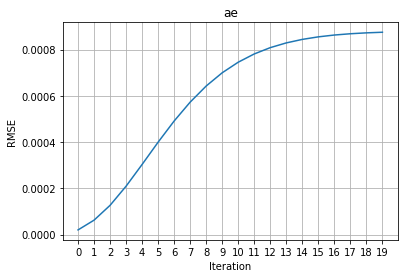

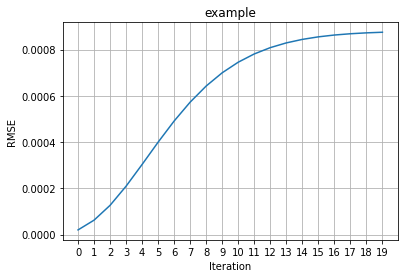

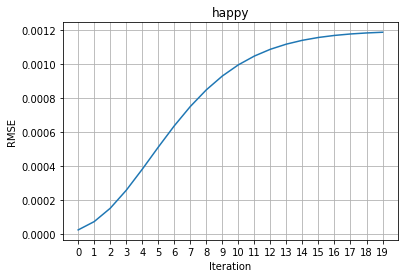

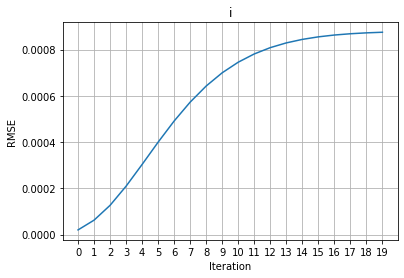

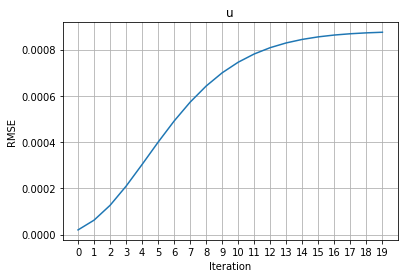

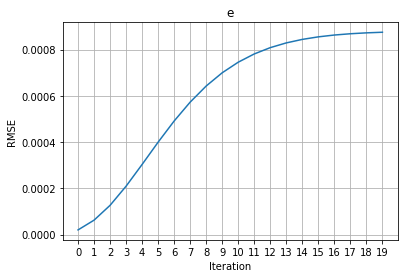

In [21]:
from unittest import TestCase
import diva_utils
import os
import csv
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt


def run_test(folder_name, mat_out_name, condition):
    num_iters = 20
    matlab_data = diva_utils.read_file_parameter_alternate(folder_name + '/' + mat_out_name + '.mat', 'runs')
    losses = []
    rm_losses = []
    loss = nn.MSELoss()

    for i in range(num_iters):
        torchdiva_out_name = 'VT_' + str(i)
        torchdiva_out_fname = os.path.join(folder_name, torchdiva_out_name + '.mat')
        mat_run_data = matlab_data[0, i]
        py_run_data = diva_utils.read_file_parameter_alternate(torchdiva_out_fname, torchdiva_out_name)

        mat_run_data = torch.from_numpy(mat_run_data)
        py_run_data = torch.from_numpy(py_run_data)
        loss_result = loss(mat_run_data, py_run_data)        
        losses.append([loss_result.item()])

        # calculate RMSE,
        # normalize by the max amplitude of the motor command signal
        motor_range = 2
        rmse = np.sqrt(loss_result.item()) / motor_range
        rm_losses.append(rmse)

    print('Average RMSE: ' + mat_out_name + ' - ' + str(num_iters) + ' iterations')
    print(str(np.mean(rm_losses)))
    xs = [i for i in range(1, 20)]
    plt.figure()
    plt.title(mat_out_name)
    plt.grid()
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.xticks(xs)
    plt.plot(xs, rm_losses)

root_fold = '../test/PyTorch_DIVA_Testing/8_2022/'    
mat_out_names = ['happy', 'i', 'u', 'e', 'ae', 'example']
mat_out_ctr = 0

for file in os.listdir(root_fold):
    fold_name = os.path.join(root_fold, file)
    file_name_array = file.split('_')
    if file_name_array[-1] == 'training':
        prod_name = file_name_array[-2]
        mat_name_idx = int(np.floor(mat_out_ctr))
        mat_out_ctr = mat_out_ctr + 0.5
        mat_out_name = mat_out_names[mat_name_idx]
        run_test(fold_name, prod_name, file_name_array[-1])


In [24]:
import diva_utils
import os
import csv
import torch
import torch.nn as nn

